# 1 Data Cleaning

In [995]:
import csv
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file
census_file = "census_1.csv"
df = pd.read_csv(census_file)

# Strip whitespace from string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Convert 'House Number' to int64
df['House Number'] = df['House Number'].astype('int64')

# Convert 'Age' to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(0).astype(int)

# Replace empty and NaN values in 'Relationship to Head of House' with 'None'
df['Relationship to Head of House'] = df['Relationship to Head of House'].replace(['', np.nan], 'None')

# Replace empty and NaN values in 'Age' with 0
df['Age'] = df['Age'].replace('', 0)

# Convert 'Street' column to string type
df['Street'] = df['Street'].astype(str)

# Convert 'First Name' column to string type
df['First Name'] = df['First Name'].astype(str)

# Convert 'Surname' column to string type
df['Surname'] = df['Surname'].astype(str)

# Convert 'Relationship to Head of House' column to string type
df['Relationship to Head of House'] = df['Relationship to Head of House'].astype(str)

# Replace empty, NaN, nan, and None values with 'No Relationship'
df['Relationship to Head of House'] = df['Relationship to Head of House'].replace(['', 'NaN', 'nan', 'None', 'NA'], 'No Relationship')

# Convert 'Marital Status' column to string type
df['Marital Status'] = df['Marital Status'].astype(str)

# Convert 'Gender' column to string type
df['Gender'] = df['Gender'].astype(str)

# Convert 'Occupation' column to string type
df['Occupation'] = df['Occupation'].astype(str)

# Replace 'Marital Status' NaN and 'nan' values with 'Not Applicable'
df['Marital Status'] = df['Marital Status'].replace(['nan', np.nan], 'Not Applicable')

# Convert 'Infirmity' column to string type
df['Infirmity'] = df['Infirmity'].astype(str)

# Replace empty, NaN, nan, and None values with 'No Infirmity'
df['Infirmity'] = df['Infirmity'].replace(['', 'NaN', 'nan', 'None', 'NA'], 'No Infirmity')

# Replacing the clssification in dataframe
df['Infirmity'] = df['Infirmity'].replace('Blind', 'Physical Disability')
df['Infirmity'] = df['Infirmity'].replace('Deaf', 'Physical Disability')
df['Occupation'] = df['Occupation'].replace('Child psychotherapist', 'Minor psychotherapist')
df['Occupation'] = df['Occupation'].replace("Nurse, children's", 'Nurse')

# Convert 'Religion' column to string type
df['Religion'] = df['Religion'].astype(str)

# Replace empty, NaN, nan, and None values with 'No Religion'
df['Religion'] = df['Religion'].replace(['', 'NaN', 'nan', 'None', 'NA'], 'No Religion')


# Define conditions and corresponding values for 'Relationship to Head of House' column
relationship_conditions = [
    (df['House Number'] == 69) & (df['First Name'] == 'Emily') & (df['Surname'] == 'Sullivan'),
    (df['House Number'] == 5) & (df['First Name'] == 'Francis') & (df['Surname'] == 'Williams'),
    (df['House Number'] == 132) & (df['First Name'] == 'Phillip') & (df['Surname'] == 'Bell'),
    (df['House Number'] == 115) & (df['First Name'] == 'Lynda') & (df['Surname'] == 'Thomas'),
    (df['House Number'] == 15) & (df['First Name'] == 'Natasha') & (df['Surname'] == 'Freeman')
]
relationship_values = ['Daughter', 'Unemployed', 'Child', 'No Relationship', 'Head']
df['Relationship to Head of House'] = np.select(relationship_conditions, relationship_values, default = df['Relationship to Head of House'])

# Define conditions and corresponding values for 'Occupation' column
occupation_conditions = relationship_conditions
occupation_values = ['Child', 'Unemployed', 'Child', 'University Student', 'Unemployed']
df['Occupation'] = np.select(occupation_conditions, occupation_values, default = df['Occupation'])

# Change Marital Status to 'Married' for House Number 109, First Name 'Glen', and Last Name 'Newton'
df.loc[(df['House Number'] == 109) & (df['First Name'] == 'Glen') & (df['Surname'] == 'Newton'), 'Marital Status'] = 'Married'

# Replace 'Religion' values based on conditions
df['Religion'] = df['Religion'].replace({'NA': 'Not Applicable', np.nan: 'None'})

# Replace 'Marital Status' values based on conditions
df['Marital Status'] = df['Marital Status'].replace(['', 'Not Applicable', 'NaN', 'nan', 'None', 'NA', np.nan, np.NaN], 'Minor')

# Replacing the typo in dataframe
df['Religion'] = df['Religion'].replace('Nope', 'No Religion')
df['Religion'] = df['Religion'].replace('Buddist', 'Buddhist')

# Replacing the typo in dataframe
new_df = df.replace('Neice', 'Niece')

# Define age group bins for a new column 'Age_Group'
age_bins = [0, 18, 36, 54, 72, 90, 108]

# Define age group labels
age_labels = ['0-18', '18-36', '36-54', '54-72', '72-90', '90-108']

# Create a new column 'Age Group' based on age bins
new_df['Age_Group'] = pd.cut(new_df['Age'], bins = age_bins, labels = age_labels, include_lowest = True, right = False)

# Creating new csv file after data cleaning
clean_data = "updated_census.csv"
new_df.to_csv(clean_data, index = False)

# Print a message to confirm the save
print(f"DataFrame has been saved to {clean_data}")

DataFrame has been saved to updated_census.csv


# 2 New csv Files for Analysis

In [966]:
# Filter rows based on keywords in 'Occupation' column and exclude specific occupations
filtered_df = new_df[~new_df['Occupation'].str.contains('student|child|retired', case = False, regex = True)]

# Separate file for updated occupants
excluded_occupations = "updated_occupation.csv"
filtered_df.to_csv(excluded_occupations, index=False)

# Group by street and count unique houses
houses_per_street = new_df.groupby('Street')['House Number'].nunique().reset_index(name='Unique Houses')

# Calculates unique number of houses
unique_houses = "unique_houses.csv"
houses_per_street.to_csv(unique_houses, index = False)

# 3  Visualizations

## 3.1(a) Histogram: Distribution of Age wrt Gender

count    9405.00
mean       36.14
std        21.49
min         0.00
25%        18.00
50%        36.00
75%        51.00
max       107.00
Name: Age, dtype: float64
Number of bins:  30


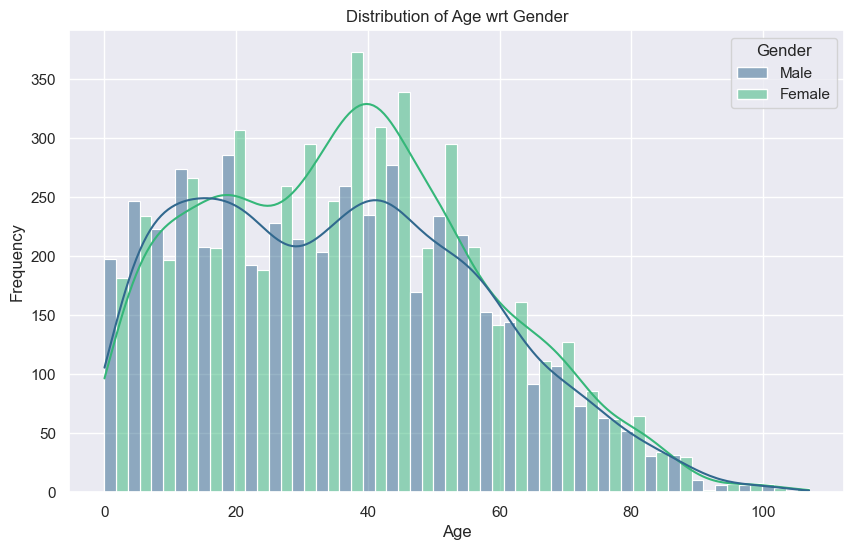

In [967]:
# Age statistics 
age_statistics = new_df['Age'].describe()
print(age_statistics.round(2))

# Using Scott's Rule to select the bin size
data_std = np.std(new_df['Age'])
n = len(new_df['Age'])
bin_width = 3.5 * data_std / (n**(1/3))
num_bins = int((new_df['Age'].max() - new_df['Age'].min()) / bin_width)
print("Number of bins: ", num_bins)

# Histogram
sns.set(style = "darkgrid")
plt.figure(figsize = (10, 6))

sns.histplot(data = new_df, x ='Age', bins = num_bins, kde = True, hue = 'Gender', palette = 'viridis', multiple = 'dodge')
plt.title('Distribution of Age wrt Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.savefig('Age Distribution wrt Gender.png')
plt.show()


## 3.1(b) Age Pyramid: Distribution of Population Gender wrt Age Group

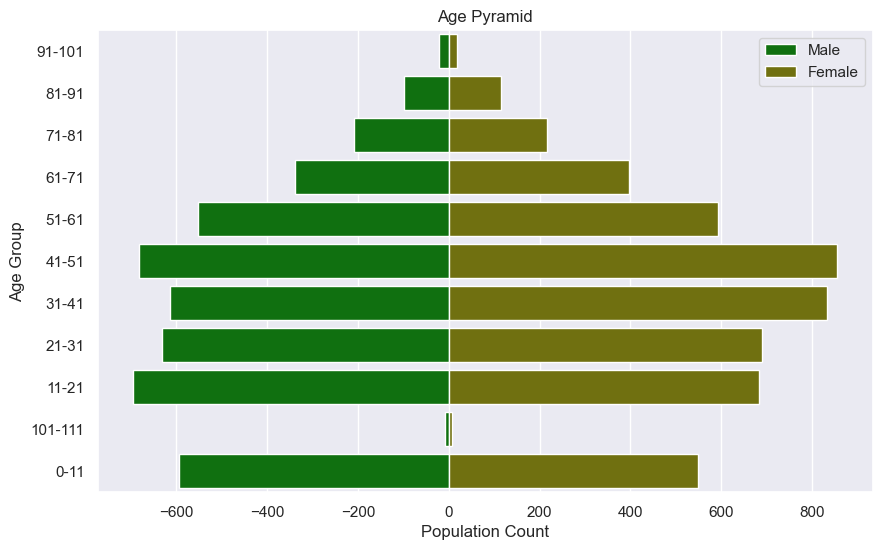

In [1039]:
# Define age group bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

# Define age group labels
age_labels = ['0-11', '11-21', '21-31', '31-41', '41-51', '51-61', '61-71', '71-81', '81-91', '91-101', '101-111']

# Create a new column 'Age Group' based on age bins
new_df['Age_Group'] = pd.cut(new_df['Age'], bins = age_bins, labels = age_labels, include_lowest = True, right = False)
# Convert 'Age_Group' to string to avoid Categorical issues
new_df['Age_Group'] = new_df['Age_Group'].astype(str)

# Filtering corresponding category
female_data = new_df[new_df['Gender'] == 'Female']
male_data = new_df[new_df['Gender'] == 'Male']

# Grouping by of each gender
female_df = female_data.groupby('Age_Group').size().reset_index(name = 'Female')
male_df = male_data.groupby('Age_Group').size().reset_index(name = 'Male')

# Merging of categories
age_population_df = pd.merge(female_df, male_df, on = 'Age_Group', how = 'outer').fillna(0)

# Negative for males
age_population_df['Male'] = age_population_df['Male'].multiply(-1)

# Age Pyramid
plt.figure(figsize = (10, 6))
sns.set_style("darkgrid")

age_pyramid = sns.barplot(x = 'Male', y = 'Age_Group', data = age_population_df, color = 'Green', label = 'Male')
age_pyramid = sns.barplot(x = 'Female', y = 'Age_Group', data = age_population_df, color = 'Olive', label = 'Female')
age_pyramid.invert_yaxis()
age_pyramid.legend() 

plt.title('Age Pyramid')
age_pyramid.set(xlabel = 'Population Count', ylabel = 'Age Group')
plt.savefig('Age Pyramid.png')
plt.show()

## 3.2 Count Plot: Marital Status Distribution by Gender

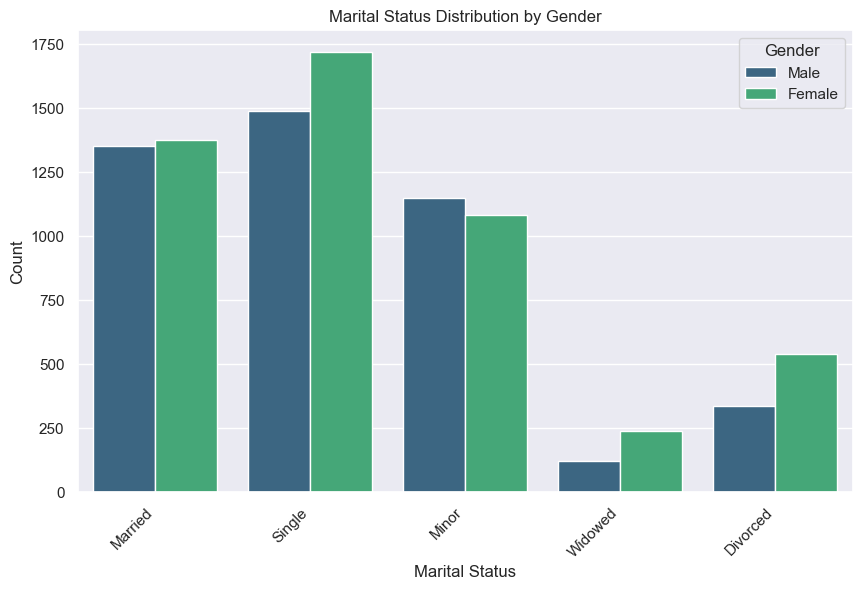

In [968]:
# Set the style for the plot
sns.set(style = "darkgrid")
plt.figure(figsize = (10, 6))

# Create a countplot for Marital Status and Gender
sns.countplot(x = "Marital Status", hue="Gender", data = new_df, palette = "viridis")
plt.title('Marital Status Distribution by Gender')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')

plt.savefig('Marital Status wrt Gender.png')
plt.show()


## 3.3 Violin Plot: Marital Status and Age Distribution

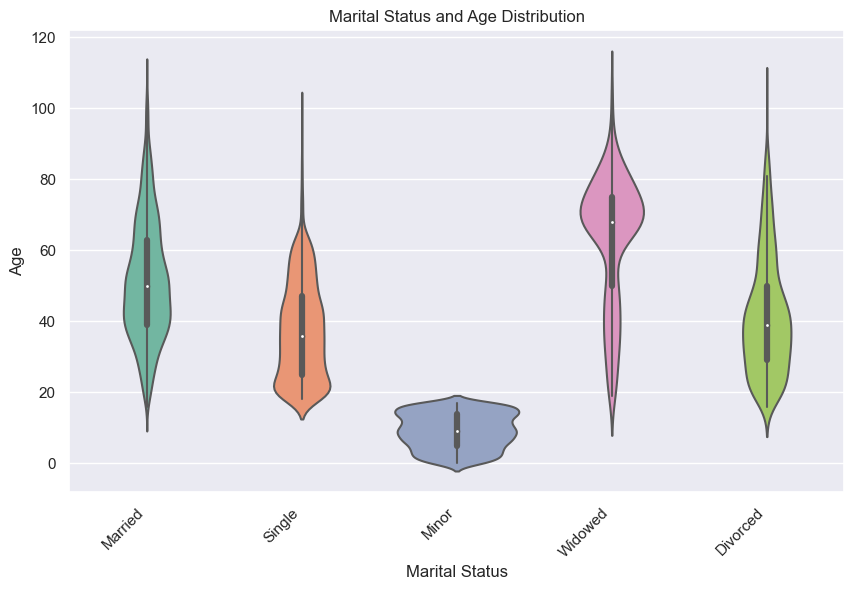

In [969]:
# Set the style for the plot
sns.set(style = "darkgrid")
plt.figure(figsize = (10, 6))

# Create a violin plot for Marital Status and Age
sns.violinplot(x = "Marital Status", y = "Age", data = new_df, palette = "Set2")
plt.title('Marital Status and Age Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.xticks(rotation = 45, ha = 'right')

plt.savefig('Marital Status and age.png')
plt.show()


## 3.4 Count Plot: Age Distribution of The Population

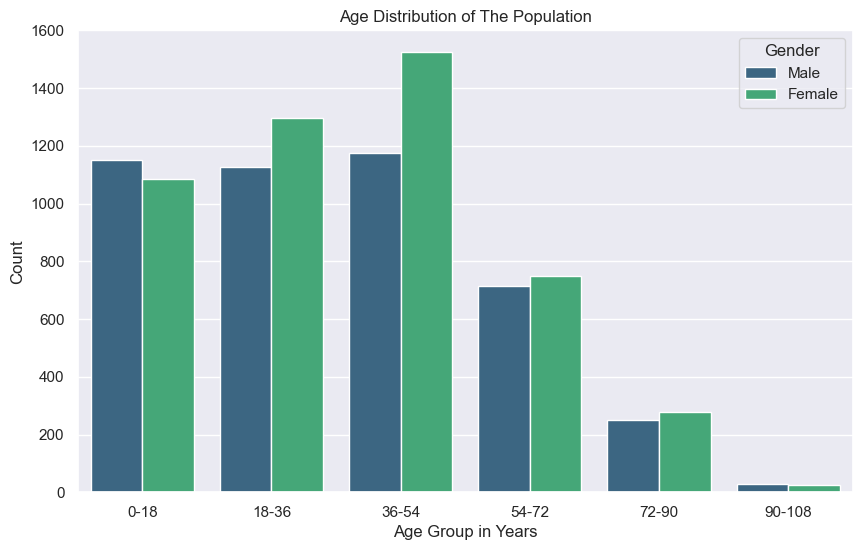

In [970]:
# Set the style for the plot
sns.set(style = "darkgrid")
plt.figure(figsize = (10, 6))

# Create a Countplot for Gender and Age Group
sns.countplot(x = "Age_Group", hue = "Gender", data = new_df, palette = "viridis")
plt.title('Age Distribution of The Population')
plt.xlabel('Age Group in Years')
plt.ylabel('Count')

plt.savefig('gender_count_by_age_group.png')
plt.show()


## 3.5 Count Plot: Religious Affiliations

No Religion: 57.35%
Christian: 22.34%
Catholic: 10.87%
Methodist: 6.78%
Muslim: 1.56%
Sikh: 0.56%
Jewish: 0.41%
Undecided: 0.02%
Buddhist: 0.02%
Pagan: 0.02%
Quaker: 0.02%
Sith: 0.02%
Jedi: 0.01%


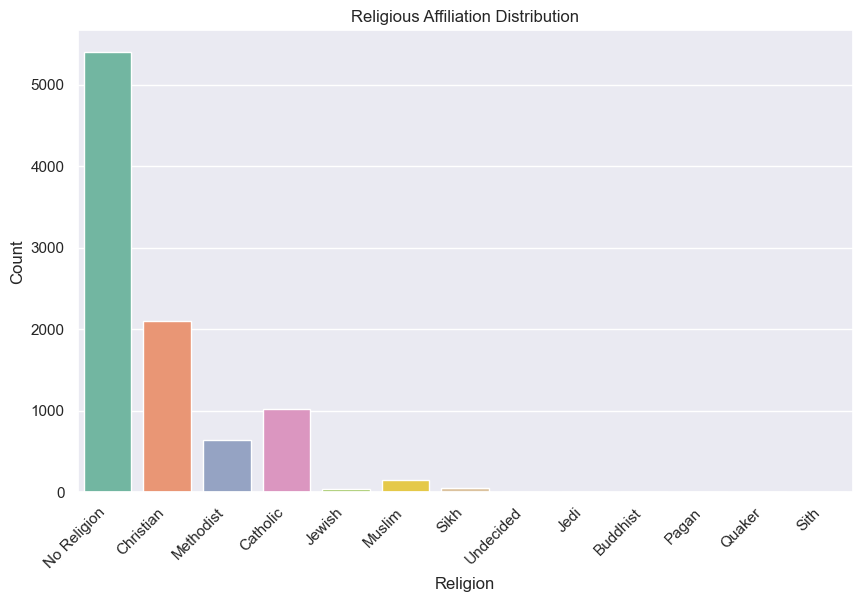

In [971]:
# Religious Statistics percentages
religion_statistics = new_df['Religion'].value_counts(normalize = True)

for value, percentage in (religion_statistics * 100).items():
    print(f"{value}: {percentage:.2f}%")
    
sns.set(style = "darkgrid")
plt.figure(figsize = (10, 6))

# Count Plot of Religious Affiliations
sns.countplot(data = new_df, x = 'Religion', palette = 'Set2')
plt.title('Religious Affiliation Distribution')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')

plt.savefig('Religious Distribution.png')
plt.show()

## 3.6 Violin Plot: Age Distribution by Religion

No Religion: 57.35%
Christian: 22.34%
Catholic: 10.87%
Methodist: 6.78%
Muslim: 1.56%
Sikh: 0.56%
Jewish: 0.41%
Undecided: 0.02%
Buddhist: 0.02%
Pagan: 0.02%
Quaker: 0.02%
Sith: 0.02%
Jedi: 0.01%
The most followed religion is: No Religion with a count of 5394
The least followed religion is: Jedi with a count of 1


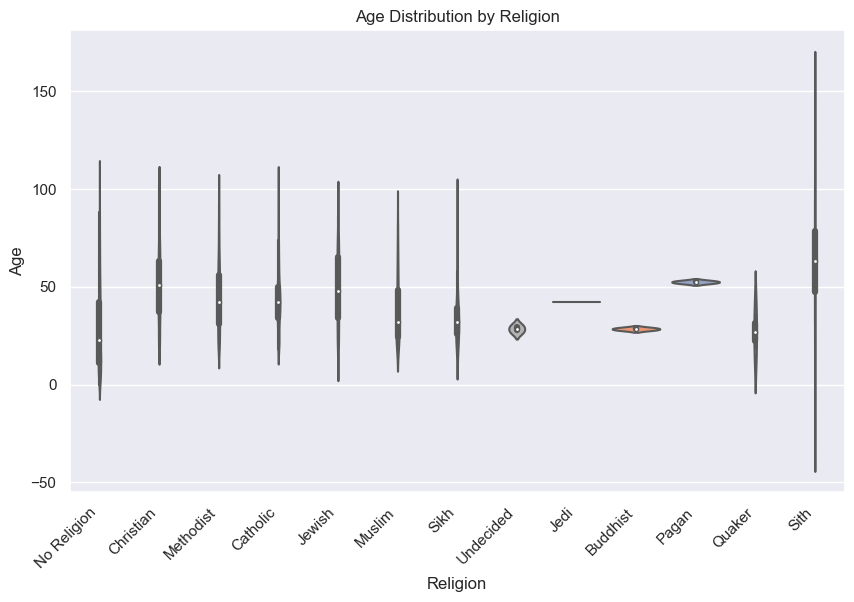

In [972]:
# %age of each Religion
religious_statistics = new_df['Religion'].value_counts(normalize = True)

for value, percentage in (religious_statistics * 100).items():
    print(f"{value}: {percentage:.2f}%")

# Religious Statistics analysis
religion_counts = df['Religion'].value_counts()

most_followed_religion = religion_counts.idxmax()
least_followed_religion = religion_counts.idxmin()

most_followed_religion_count = religion_counts.max()
least_followed_religion_count = religion_counts.min()

print(f"The most followed religion is: {most_followed_religion} with a count of {most_followed_religion_count}")
print(f"The least followed religion is: {least_followed_religion} with a count of {least_followed_religion_count}")

sns.set(style = "darkgrid")
plt.figure(figsize = (10, 6))

# Create a violin plot
sns.violinplot(data = new_df, x = 'Religion', y = 'Age', palette = 'Set2')
plt.title('Age Distribution by Religion')
plt.xlabel('Religion')
plt.ylabel('Age')
plt.xticks(rotation = 45, ha = 'right')

plt.savefig('Age_Religious Distribution.png')
plt.show()


## 3.7 Histogram: Age Distribution of Unemployed Population by Gender

The most famous occupation is: Unemployed with a count of 650
The least famous occupation is: Education officer, community with a count of 1


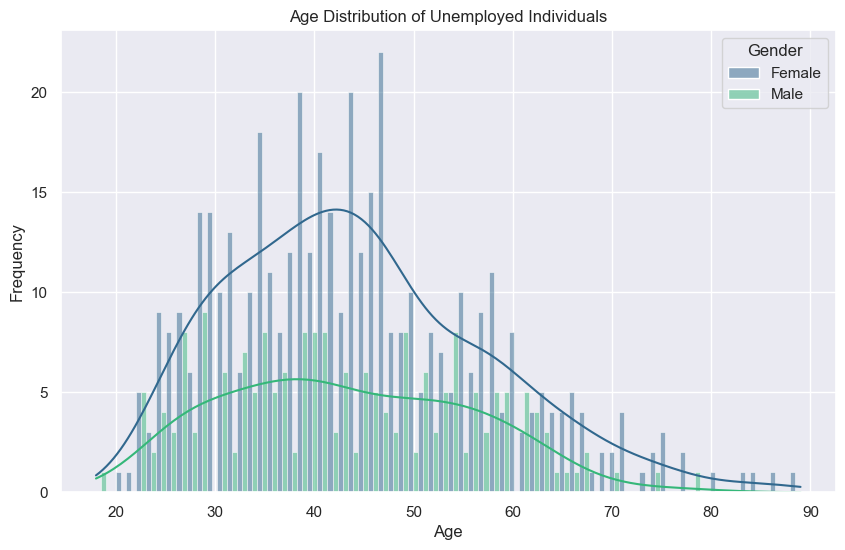

Unemployed: 11.49%
Health promotion specialist: 0.32%
Sports development officer: 0.30%
Holiday representative: 0.28%
Engineer, civil (contracting): 0.28%
Medical secretary: 0.28%
Surveyor, planning and development: 0.27%
Manufacturing systems engineer: 0.27%
Counsellor: 0.27%
Intelligence analyst: 0.27%
Engineer, electrical: 0.27%
Mechanical engineer: 0.25%
Physiotherapist: 0.25%
Forest/woodland manager: 0.25%
Police officer: 0.25%
Designer, jewellery: 0.25%
Civil Service administrator: 0.25%
Nurse, mental health: 0.25%
Education officer, environmental: 0.25%
Minerals surveyor: 0.23%
Nature conservation officer: 0.23%
Retail manager: 0.23%
Embryologist, clinical: 0.23%
Armed forces logistics/support/administrative officer: 0.23%
Volunteer coordinator: 0.23%
Buyer, industrial: 0.23%
Stage manager: 0.23%
Mudlogger: 0.23%
Cytogeneticist: 0.23%
Tour manager: 0.23%
Doctor, hospital: 0.23%
Technical sales engineer: 0.23%
Acupuncturist: 0.23%
Building services engineer: 0.23%
Environmental h

In [973]:
# Counts the values for occupation using count() method
occupation_counts = filtered_df['Occupation'].value_counts()

# Max and Min id for the occupation count using these methods
most_famous_occupation = occupation_counts.idxmax()
least_famous_occupation = occupation_counts.idxmin()

# Counts their number Max and Min
most_famous_occupation_count = occupation_counts.max()
least_famous_occupation_count = occupation_counts.min()

print(f"The most famous occupation is: {most_famous_occupation} with a count of {most_famous_occupation_count}")
print(f"The least famous occupation is: {least_famous_occupation} with a count of {least_famous_occupation_count}")
   
# Filter the dataframe for individuals with the occupation 'Unemployed'
unemployed_df = filtered_df[filtered_df['Occupation'] == 'Unemployed']

# Create a histogram for the age distribution of unemployed individuals
sns.set(style = "darkgrid")
plt.figure(figsize = (10, 6))

sns.histplot(data = unemployed_df, x = 'Age', bins = 70, kde = True, palette = 'viridis', hue = 'Gender', multiple = 'dodge')
plt.title('Age Distribution of Unemployed Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.savefig('Unemployed_Age.png')
plt.show()

# %age of each occupation
occupation_statistics = filtered_df['Occupation'].value_counts(normalize = True)

for value, percentage in (occupation_statistics * 100).items():
    print(f"{value}: {percentage:.2f}%")


# 4 End